In [3]:

#importing the necesary libaries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import date
from pandas import Series, DataFrame
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [44]:
import pandas_datareader as pdr ##import this libraries since i  want  to scrap data from the yahoo finance website 

In [45]:
#define the start time and end time ....take a bigger time frame for ur dataset to improve the accuracy of the model 
start  = "2010-01-01"
today = date.today().strftime("%Y-%m-%d")

In [46]:

stock = pdr.DataReader('AAPL' , 'yahoo' , start , today )
stock.head() #to se the start dating of ur data 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553027
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564356
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447999


In [47]:
stock.tail() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-18,172.539993,169.410004,171.509995,169.800003,90956700.0,169.800003
2022-01-19,171.080002,165.940002,170.000000,166.229996,94815000.0,166.229996
2022-01-20,169.679993,164.179993,166.979996,164.509995,91420500.0,164.509995
2022-01-21,166.330002,162.300003,164.419998,162.410004,122501300.0,162.410004
2022-01-24,162.300003,154.699997,160.020004,161.619995,162294600.0,161.619995


Data understanding 

The COLUMN INFO 

The Opening Value of the stock of the  day 

the Highest values of that stock of the  days

The  Lowest values of that stock of the days

The Closing Value at the end of the day

the volume of stock sold that day 

The Adjusted Close Value reflects the stock’s value after dividends have been declared (too 
technical!)


In [8]:
# Summery stats for  Stock
stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3037.000000,3037.000000,3037.000000,3037.000000,3.037000e+03,3037.000000
mean,43.778134,42.879305,43.326172,43.345497,2.694334e+08,41.623141
std,39.487830,38.581318,39.026410,39.050877,2.256903e+08,39.578424
min,7.000000,6.794643,6.870357,6.858929,4.100000e+07,5.880607
25%,18.676071,18.371786,18.535713,18.557501,1.090784e+08,16.236658
50%,28.587500,28.070000,28.350000,28.362499,1.830836e+08,26.159094
75%,49.092499,48.192501,48.674999,48.547501,3.693956e+08,47.439812
max,182.940002,179.119995,182.630005,182.009995,1.880998e+09,182.009995


In [9]:
# General Info
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3037 entries, 2009-12-31 to 2022-01-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3037 non-null   float64
 1   Low        3037 non-null   float64
 2   Open       3037 non-null   float64
 3   Close      3037 non-null   float64
 4   Volume     3037 non-null   float64
 5   Adj Close  3037 non-null   float64
dtypes: float64(6)
memory usage: 166.1 KB


<AxesSubplot:xlabel='Date'>

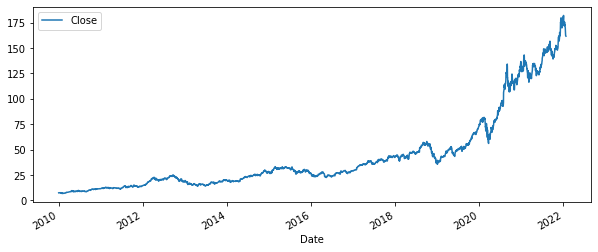

In [10]:

# Let's see a historical view of the closing price
stock['Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

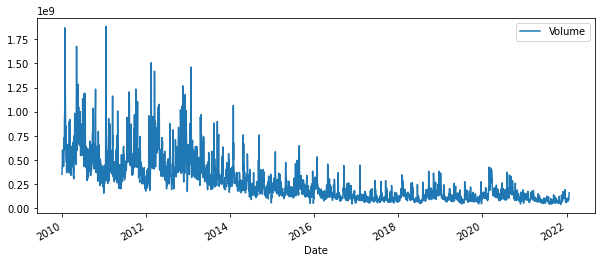

In [11]:

# Now let's plot the total volume of stock being traded each day over the past year

stock['Volume'].plot(legend=True, figsize=(10,4))

In [12]:
#lets now calaculate the moving Average 
#Moving averages are usually calculated to identify the trend direction
#A 10-day moving average would average out the closing prices for the first 10 days as the first data point.
# The next data point would drop the earliest price,
# add the price on day 11 and take the average.
#lets calcuate the moving Average of the first 50 , 100 , 200 day 
# Pandas has a built-in rolling mean calculator 

# Let's go ahead and plot out several moving averages
MA_day = [50,100,200]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    stock[column_name] = stock['Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

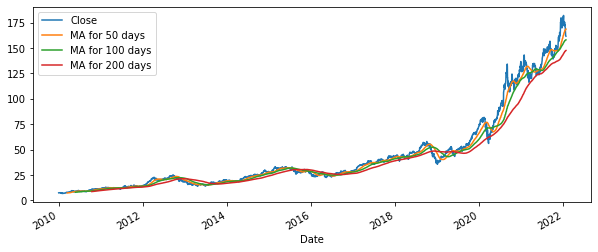

In [13]:
stock[['Close','MA for 50 days','MA for 100 days','MA for 200 days']].plot(subplots=False, 
    figsize=(10,4))   #if the 50 day is higher than 100 ,200 then this means that the trend is good if the 200 is higher than 50 and higher then thir is a downgrade 

Daily return analysis 

We're now going to analyze the risk of the stock.In order to do so, we need to take a closer look at the daily changes of the stock,

<AxesSubplot:xlabel='Date'>

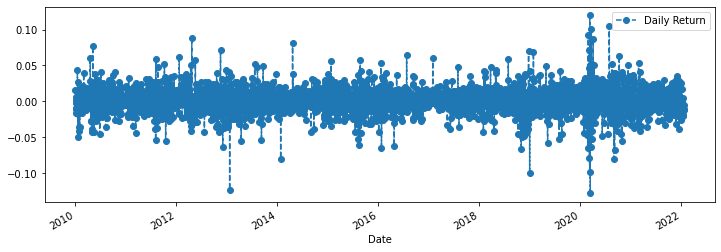

In [14]:
#daily return analysis 
#we will use the pct_change to find the percentage change for each day 
stock['Daily Return'] = stock['Close'].pct_change()
#lets visulaize the daily return 
stock['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

In [15]:
stock.shape

(3037, 10)

In [16]:
stock.dtypes

High               float64
Low                float64
Open               float64
Close              float64
Volume             float64
Adj Close          float64
MA for 50 days     float64
MA for 100 days    float64
MA for 200 days    float64
Daily Return       float64
dtype: object

spiliting the dataset into training and testing 


In [17]:
# #we will predicting on our close column 
# data_training = pd.DataFrame(stock['Close'][0:int(len(stock)*0.70)])#starting at 0 index i want to go till 70 % of data for training 
# #
# data_testing = pd.DataFrame(stock['Close'][0:int(len(stock)*0.30)]) #testing 30% of the dataset 


In [18]:
data_training = pd.DataFrame(stock['Close'][0:int(len(stock)*0.70)])#starting at 0 index i want to go till 70 % of data for training 
#
data_testing = pd.DataFrame(stock['Close'][ int(len(stock)*0.70):int(len(stock))]) #the rest of data is used for testing 



In [19]:
print(data_training.shape)
print(data_testing.shape )


(2125, 1)
(912, 1)


In [20]:
print(data_training.head())

               Close
Date                
2009-12-31  7.526071
2010-01-04  7.643214
2010-01-05  7.656429
2010-01-06  7.534643
2010-01-07  7.520714


In [21]:
print(data_testing.head())

                Close
Date                 
2018-06-12  48.070000
2018-06-13  47.674999
2018-06-14  47.700001
2018-06-15  47.209999
2018-06-18  47.185001


In [22]:
print(data_testing.tail())

                 Close
Date                  
2022-01-18  169.800003
2022-01-19  166.229996
2022-01-20  164.509995
2022-01-21  162.410004
2022-01-24  161.619995


In [23]:
#lets scale our dataset 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [24]:
data_training_scaled = scaler.fit_transform(data_training)
data_training_scaled # we have converted our data train to array 

array([[0.01602317],
       [0.01883667],
       [0.01915406],
       ...,
       [0.99687777],
       [0.98630995],
       [0.98348787]])

In [25]:
#split our training data into xtrain and y train 
#Creating data stucture with 100 timesteps and 1 output. 
        #7 timesteps meaning storing trends from 100 days before current day to predict 1 next output
x_train=[] #xtrain is our feature class  100 days is xtrain 
y_train=[] #ytrain is our predicted class .. the value that is suppose to be predicted  101 the 1 data is the ytrain 
#insert values in this list , 
for i in range(100,data_training_scaled.shape[0]):#lets define our steps as 100 days , include all  the daat training 
            x_train.append(data_training_scaled[i-100:i]) #start from 0 that is why its i-100 to i 
            y_train.append(data_training_scaled[i,0]) 
#lets convert the xtrain and y train into numpy array  so as to provide this data to our lstm 
#lets convert the list to array  to feed it into the model
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [26]:
print(x_train.shape)


(2025, 100, 1)


Machine learning model

In [27]:
import keras
import tensorflow as tf

In [28]:

  #Building Rnn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import LSTM

In [29]:
#intialzie the rnn model to sequential  
model=Sequential() 

#Add first LSTM layer
model.add(LSTM(units=50, activation = 'relu' , return_sequences=True , input_shape = (x_train.shape[1],1))) 
#units=no. of neurons in layer
#input_shape=(timesteps is 100 and its present at index 1 ,no. of cols/features we have is 1 )
#return_seq=True for sending recc memory. For last layer, retrun_seq=False since end of the line
model.add(Dropout(0.2))

#Add 2nd LSTM layer
model.add(LSTM(units=60, activation = 'relu' ,return_sequences=True))
model.add(Dropout(0.3))
        
 #Add 3rd LSTM layer
model.add(LSTM(units=80, activation = 'relu' , return_sequences=True))
model.add(Dropout(0.4))
        
 #Add 4th LSTM layer
model.add(LSTM(units=50 ,activation = 'relu' ,))
model.add(Dropout(0.5))
#Add output layer dense layer connect all the layer 
model.add(Dense(units=1))

In [30]:
model.summary() #summary of the Rnn model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [31]:

#complile the model 

model.compile(optimizer='adam',loss='mean_squared_error' , metrics=['accuracy'])
        
#Training
model.fit(x_train , y_train , epochs=50 )

        

Epoch 1/50
64/64 [==============================] - 39s 293ms/step - loss: 0.0515 - accuracy: 4.9383e-04
Epoch 2/50
64/64 [==============================] - 19s 298ms/step - loss: 0.0143 - accuracy: 4.9383e-04
Epoch 3/50
64/64 [==============================] - 18s 283ms/step - loss: 0.0115 - accuracy: 4.9383e-04
Epoch 4/50
64/64 [==============================] - 19s 298ms/step - loss: 0.0107 - accuracy: 4.9383e-04
Epoch 5/50
64/64 [==============================] - 18s 289ms/step - loss: 0.0093 - accuracy: 4.9383e-04
Epoch 6/50
64/64 [==============================] - 19s 292ms/step - loss: 0.0093 - accuracy: 4.9383e-04
Epoch 7/50
64/64 [==============================] - 20s 314ms/step - loss: 0.0082 - accuracy: 4.9383e-04
Epoch 8/50
64/64 [==============================] - 21s 323ms/step - loss: 0.0086 - accuracy: 4.9383e-04
Epoch 9/50
64/64 [==============================] - 19s 298ms/step - loss: 0.0076 - accuracy: 4.9383e-04
Epoch 10/50
64/64 [==============================] - 20

In [32]:

#save our model 
model.save('keras_model.h5')


In [33]:
#lets append data training and data testing 
#we need to have value of the past 100 day that is in data training 
past_100_days = data_training.tail(100)
final_stock= past_100_days.append(data_testing, ignore_index=True)
 

In [34]:
#scale our data testing 
final_stock_scaled = scaler.fit_transform(final_stock)

In [35]:
final_stock_scaled.shape

(1012, 1)

In [36]:
#define xtest and ytest from data testing 
x_test=[]
y_test=[]
for i in range(100,final_stock_scaled.shape[0]):
            x_test.append(final_stock_scaled[i-100:i])
            y_test.append(final_stock_scaled[i,0]) 
#lets convert the list to array 
x_test = np.array(x_test) 
y_test = np.array(y_test)   

print(x_test.shape)
print(y_test.shape)         

(912, 100, 1)
(912,)


In [37]:
#prediction
prediction = model.predict(x_test)

prediction .shape 


(912, 1)

In [38]:
scaler_factor = 1/0.02862869
prediction = prediction *scaler_factor
y_test= y_test*scaler_factor

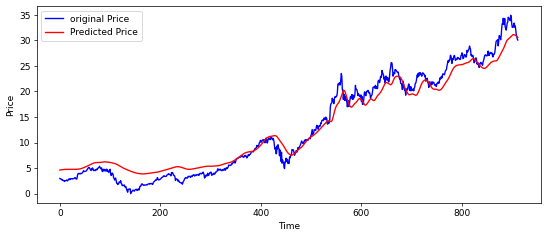

In [41]:
#lets plot the prediction
plt.figure(figsize=(10,4),dpi=65)
plt.plot(y_test, 'b' , label='original Price')  
plt.plot(prediction , 'r' , label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()